In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load dữ liệu từ file CSV (ví dụ)
df = pd.read_csv('C:\\Users\\Administrator\\Downloads\\VCB.csv')
df1=df.reset_index()['Price']
df1.describe

<bound method NDFrame.describe of 0       11929.0
1       11841.0
2       11797.0
3       11885.0
4       11797.0
         ...   
2491    81500.0
2492    81200.0
2493    81100.0
2494    80900.0
2495    80800.0
Name: Price, Length: 2496, dtype: float64>

In [3]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
# Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],X_train.shape[1])
X_train, y_train

(array([[0.01512138, 0.01420493, 0.01374671, ..., 0.02063047, 0.02063047,
         0.02383804],
        [0.01420493, 0.01374671, 0.01466315, ..., 0.02063047, 0.02383804,
         0.02337982],
        [0.01374671, 0.01466315, 0.01374671, ..., 0.02383804, 0.02337982,
         0.02383804],
        ...,
        [0.57066536, 0.5746644 , 0.57146725, ..., 0.67302625, 0.68982431,
         0.65863387],
        [0.5746644 , 0.57146725, 0.56986347, ..., 0.68982431, 0.65863387,
         0.68182623],
        [0.57146725, 0.56986347, 0.5818606 , ..., 0.65863387, 0.68182623,
         0.6882726 ]]),
 array([0.02337982, 0.02383804, 0.02292159, ..., 0.68182623, 0.6882726 ,
        0.68021203]))

In [8]:
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [9]:
# Dự báo
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test = scaler.inverse_transform([y_test])
test_predict

array([[75826.82],
       [75545.74],
       [75342.72],
       [75261.88],
       [75264.48],
       [75590.48],
       [75272.1 ],
       [75369.24],
       [75281.46],
       [75432.08],
       [75682.58],
       [75793.28],
       [75639.5 ],
       [75741.02],
       [75797.9 ],
       [75803.98],
       [75715.02],
       [75697.94],
       [75635.18],
       [75707.34],
       [75742.76],
       [75739.44],
       [75758.24],
       [75731.76],
       [75722.82],
       [75742.88],
       [75316.78],
       [75598.44],
       [75708.6 ],
       [75522.96],
       [75722.82],
       [75619.7 ],
       [75662.7 ],
       [75602.78],
       [75635.06],
       [75742.76],
       [75716.2 ],
       [75766.96],
       [75748.62],
       [75730.16],
       [75714.8 ],
       [75785.52],
       [75687.16],
       [75788.5 ],
       [75720.98],
       [75788.5 ],
       [75736.46],
       [75705.5 ],
       [75751.6 ],
       [75748.62],
       [75714.8 ],
       [75770.04],
       [7571

In [10]:
# Dự báo giá trị 30 ngày trong tương lai
last_30_days = df1[-30:]
next_30_days = []
for i in range(30):
    x = last_30_days[-time_step:].reshape(1, time_step)
    y_hat = model.predict(x)
    next_30_days.append(y_hat)
    last_30_days = np.append(last_30_days, y_hat)

next_30_days = np.array(next_30_days).reshape(-1, 1)
next_30_days = scaler.inverse_transform(next_30_days)

print(next_30_days)

[[75714.8 ]
 [75785.52]
 [75785.52]
 [75785.52]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]
 [75800.88]]


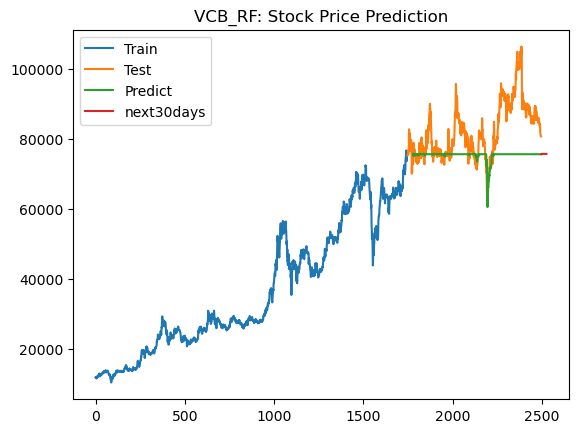

In [11]:
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
from matplotlib import pyplot as plt

# train
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label="Train")
# plt.plot([*train_range], pred_train.squeeze(), label="Predict Train", linestyle="dotted", color = color_palette[1])

# test
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
# test_range = range(len(y_true_train.squeeze()),len(y_true_train.squeeze()) + len(y_true_test.squeeze()))
plt.plot(test_data_index, scaler.inverse_transform(test_data), label="Test")
test_data_index = pd.RangeIndex(start=train_size+31, stop=len(df1), step=1)
plt.plot(test_data_index, test_predict.squeeze(), label="Predict", linestyle="-")

#30 days
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index, next_30_days.squeeze(), label="next30days")

# # Dự đoán 30 điểm tiếp theo
plt.legend()
plt.title('VCB_RF: Stock Price Prediction')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAE và MAPE trên tập test
test_score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
test_score_mape = mean_absolute_percentage_error(y_test[0], test_predict[:, 0]) * 100
test_score_mda = calculate_mda(y_test[0], test_predict[:, 0])
msle = mean_squared_log_error(y_test[0], test_predict[:, 0])

print('RMSE trên tập test là:', test_score_rmse)
print('MAPE trên tập test là:', test_score_mape, '%')
print('MDA trên tập test là:', test_score_mda, '%')
print('MSLE trên tập test là:', msle)

RMSE trên tập test là: 10234.157972887175
MAPE trên tập test là: 8.371388109599694 %
MDA trên tập test là: 20.920502092050206 %
MSLE trên tập test là: 0.014821260430949642
